In [ ]:
1.

In [1]:
import numpy as np
import statsmodels.api as sm

# Seed and data generation
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

# (a) Regress y on x without intercept
model_y_on_x = sm.OLS(y, x).fit()
print("Regression of y on x (no intercept):")
print(model_y_on_x.summary())

# (b) Regress x on y without intercept
model_x_on_y = sm.OLS(x, y).fit()
print("\nRegression of x on y (no intercept):")
print(model_x_on_y.summary())


Regression of y on x (no intercept):
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 12 Jun 2025   Prob (F-statistic):                    6.23e-31
Time:                        15:06:14   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----

ModuleNotFoundError: No module named 'ISLP'

In [4]:
pip install ISLP


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.6 MB ? eta -:--:--
   ----------- ---------------------------- 1.0/3.6 MB 1.9 MB/s eta 0:00:02
   ----------------------- ---------------- 2.1/3.6 MB 3.1 MB/s eta 0:00:01
   ---------------------------------- ----- 3.1/3.6 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   - -------------------------------------- 1.6/43.7 MB 11.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/43.7 MB 9.4 MB/s eta 0:00:05
   ----- ---------------------------------- 5.5/43.7 MB 8.8 MB/s eta 0:00:05
   ------ --------------------------------- 7.3/43.7 MB 8.7 MB/s eta 0:00:05
   -----

  DEPRECATION: Building 'autograd-gamma' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'autograd-gamma'. Discussion can be found at https://github.com/pypa/pip/issues/6334


(a) Boston dataset loaded successfully.
----------------------------------------------------------------------
(b) Data Set Dimensions and Representation:
Number of rows: 506
Number of columns: 13
Each row represents a different **suburb or town** in the Boston metropolitan area.
Each column represents a different **predictor (characteristic)** of the suburb.

Detailed information on columns (predictors):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    

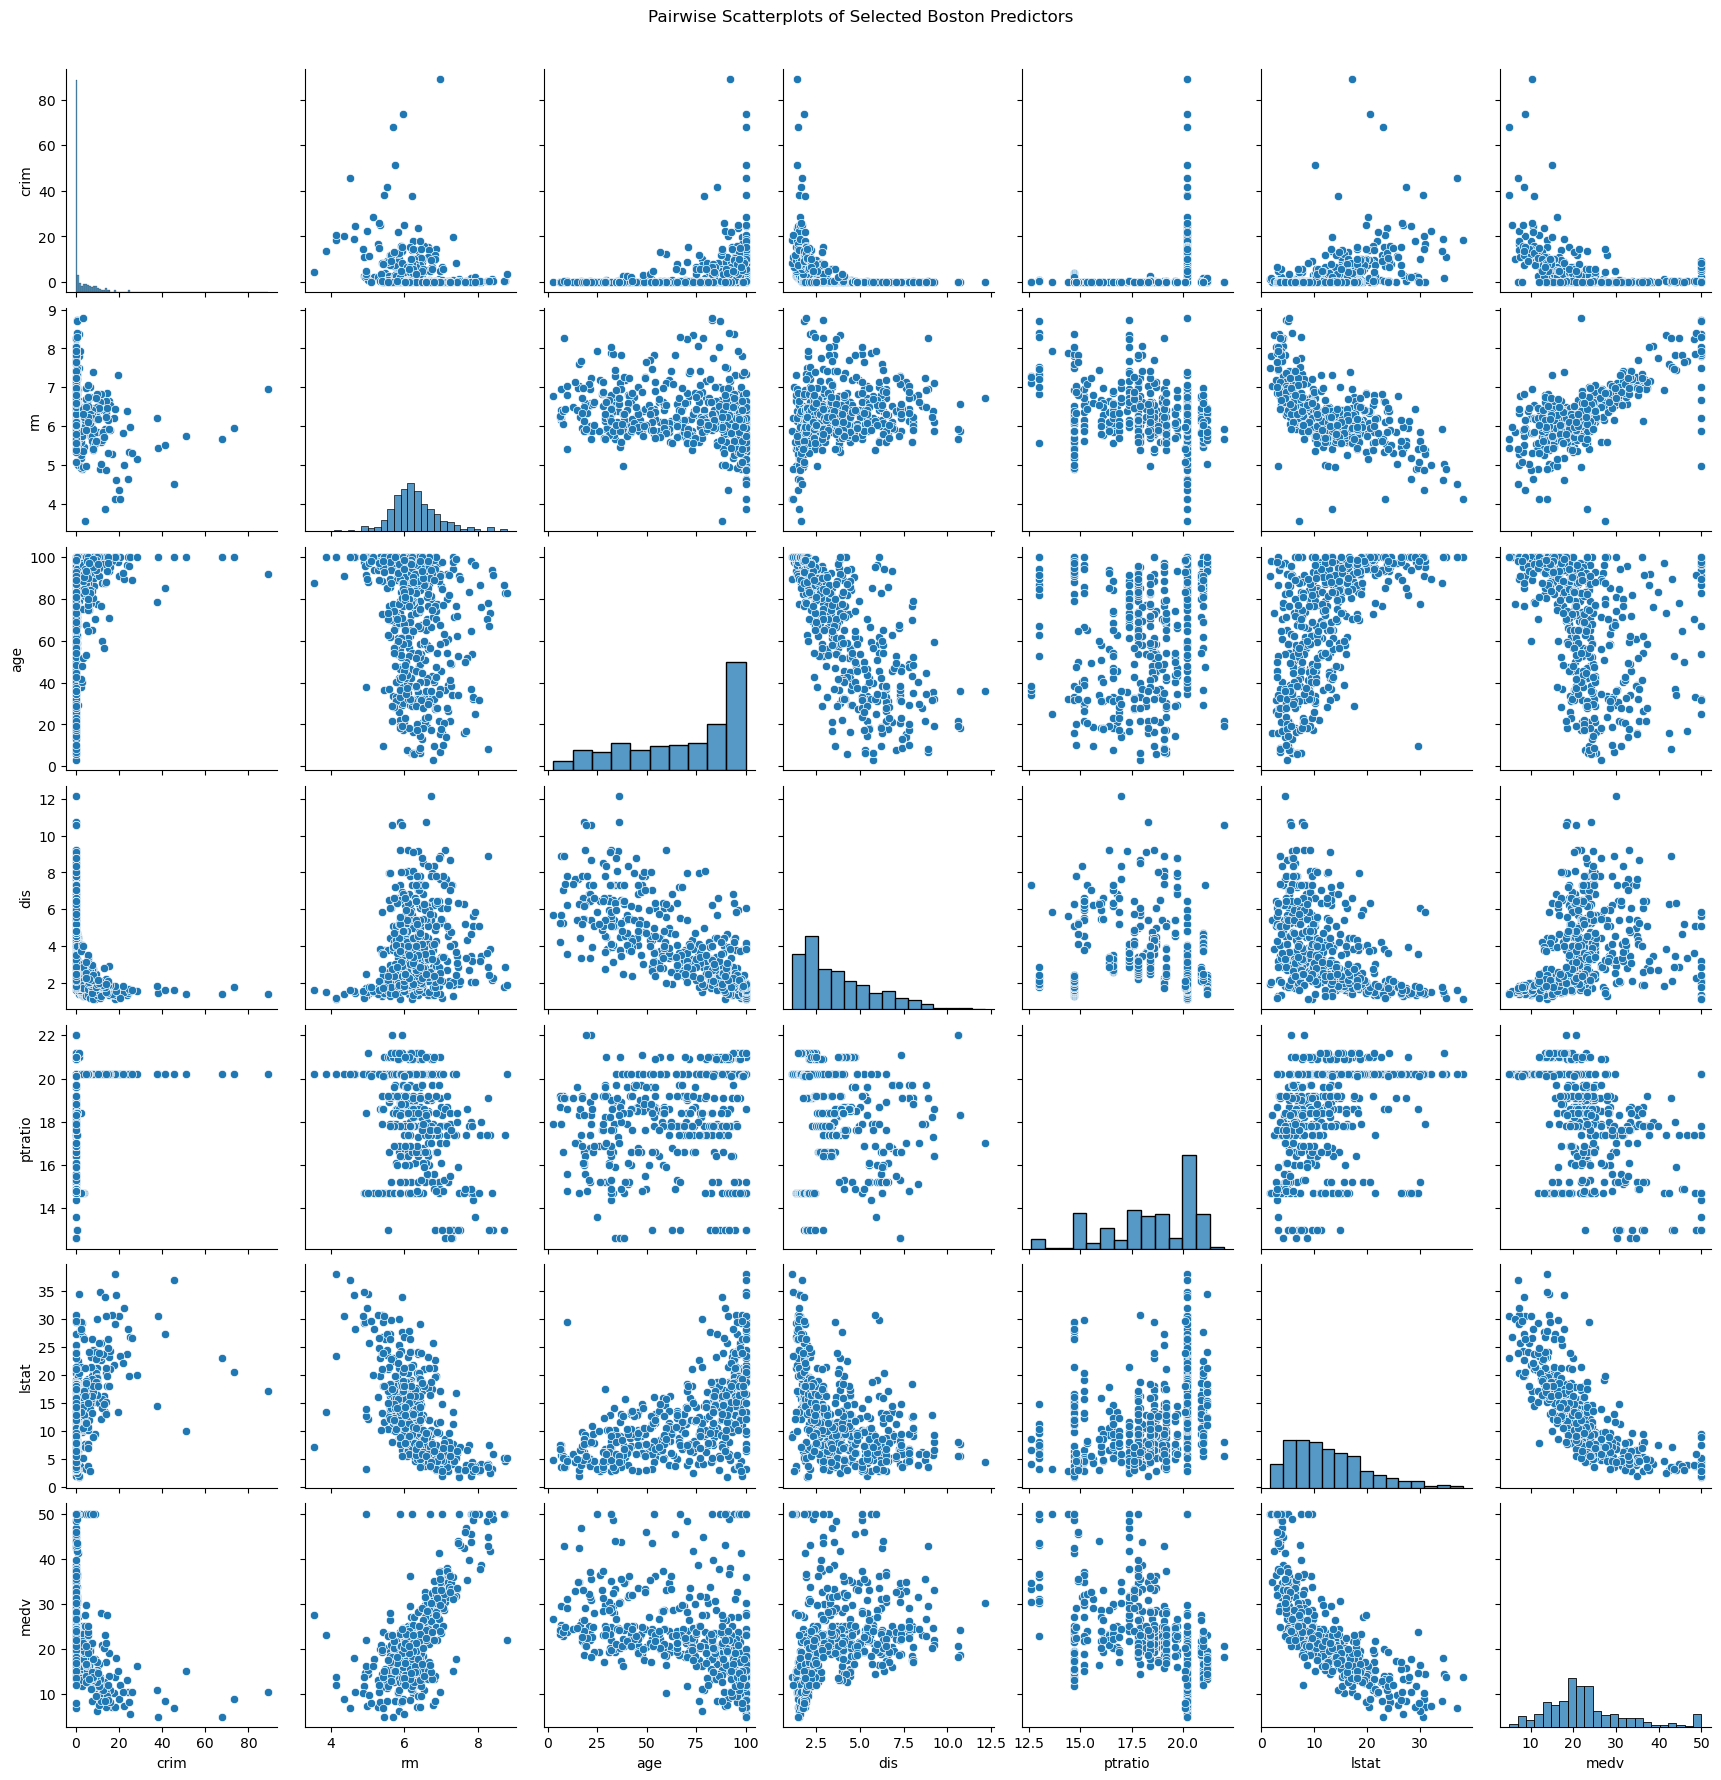

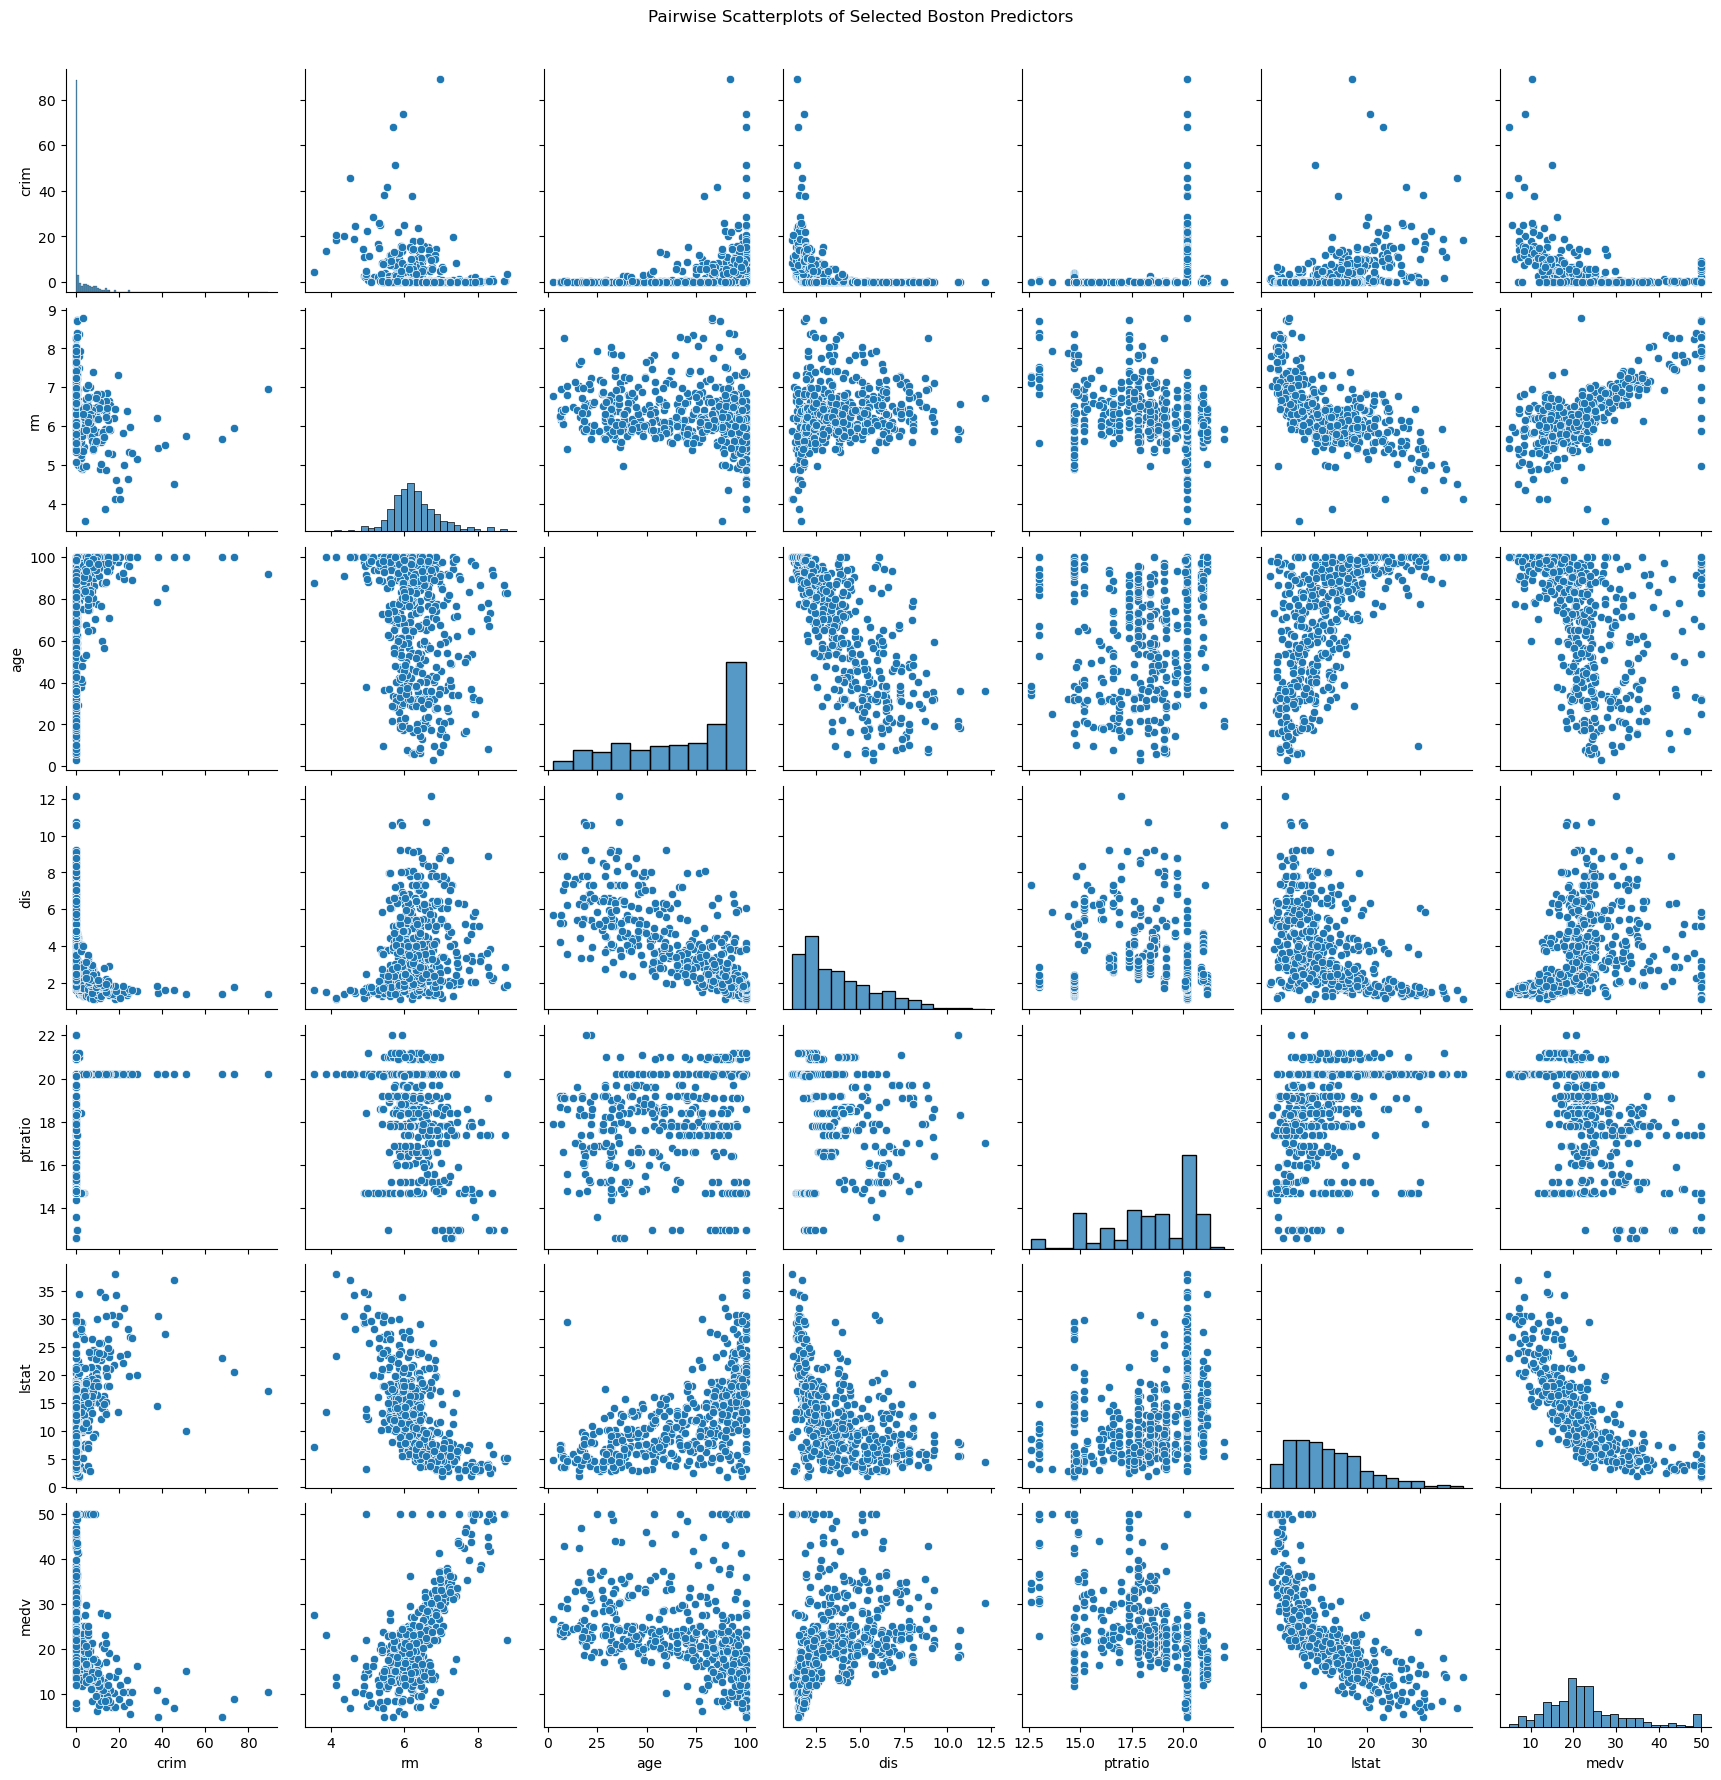


**Findings from Pairwise Scatterplots:**
- **`medv` (median home value) vs. `lstat` (% lower status population):** Shows a strong negative, non-linear relationship. As `lstat` increases, `medv` tends to decrease sharply, especially at lower `lstat` values. This suggests that areas with a higher percentage of lower-status population have significantly lower home values.
- **`medv` vs. `rm` (average rooms):** There's a clear positive linear trend; suburbs with more rooms generally correlate with higher median home values. This is intuitive, as larger homes often command higher prices.
- **`dis` (weighted distance to employment centers) vs. `nox` (nitric oxides concentration):** Often shows a negative correlation. Suburbs further from employment centers tend to have lower nitric oxide concentrations, possibly indicating cleaner air in more residential or less industrial areas.
- **`tax` (property tax rate) and `rad` (accessibility to highways):** If included in the pairplot (not in the s

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

# --- (a) Load the Boston dataset ---
# The Boston dataset is part of the ISLP library.
try:
    boston = load_data("Boston")
    print("(a) Boston dataset loaded successfully.")
except ImportError:
    print("Error: The 'ISLP' library is not installed. Please install it using 'pip install ISLP'.")
    # Exit or handle the error gracefully if ISLP is not found
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the dataset: {e}")
    exit()

print("-" * 70)

# --- (b) How many rows and columns? What do they represent? ---
num_rows, num_cols = boston.shape
print("(b) Data Set Dimensions and Representation:")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Each row represents a different **suburb or town** in the Boston metropolitan area.")
print("Each column represents a different **predictor (characteristic)** of the suburb.")

print("\nDetailed information on columns (predictors):")
# Display basic information about the DataFrame, including columns and their data types
boston.info()

print("-" * 70)

# --- (c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings. ---
print("(c) Pairwise Scatterplots of Predictors:")
print("Generating a pairplot for a subset of key predictors. This might take a moment...")

# Selecting a few predictors for a clearer pairplot demonstration
selected_cols_for_pairplot = ['crim', 'rm', 'age', 'dis', 'ptratio', 'lstat', 'medv']
pairplot = sns.pairplot(boston[selected_cols_for_pairplot])
pairplot.fig.suptitle("Pairwise Scatterplots of Selected Boston Predictors", y=1.02)

# Save the plot to the desired location
save_path = r'D:\Documents\My docs\Academics\Notes\Data Mining\Assignment 1\pairwise_scatterplot.png'
pairplot.savefig(save_path)

print(f"Pairplot saved successfully to: {save_path}")

# Select a representative subset of predictors for the pairplot.
# 'medv' (median home value) is often a key response variable.
# 'crim' (crime rate) is a key predictor in the subsequent questions.
# 'rm' (rooms), 'lstat' (lower status population), 'dis' (distance to employment centers),
# 'age' (proportion of old units), 'ptratio' (pupil-teacher ratio) are also important.
selected_cols_for_pairplot = ['crim', 'rm', 'age', 'dis', 'ptratio', 'lstat', 'medv']

# Create the pairplot
sns.pairplot(boston[selected_cols_for_pairplot])
plt.suptitle("Pairwise Scatterplots of Selected Boston Predictors", y=1.02) # Add a title
plt.show()

print("\n**Findings from Pairwise Scatterplots:**")
print("- **`medv` (median home value) vs. `lstat` (% lower status population):** Shows a strong negative, non-linear relationship. As `lstat` increases, `medv` tends to decrease sharply, especially at lower `lstat` values. This suggests that areas with a higher percentage of lower-status population have significantly lower home values.")
print("- **`medv` vs. `rm` (average rooms):** There's a clear positive linear trend; suburbs with more rooms generally correlate with higher median home values. This is intuitive, as larger homes often command higher prices.")
print("- **`dis` (weighted distance to employment centers) vs. `nox` (nitric oxides concentration):** Often shows a negative correlation. Suburbs further from employment centers tend to have lower nitric oxide concentrations, possibly indicating cleaner air in more residential or less industrial areas.")
print("- **`tax` (property tax rate) and `rad` (accessibility to highways):** If included in the pairplot (not in the selected subset above, but visible in a full pairplot or correlation matrix), these variables might show distinct clusters or non-continuous relationships. This suggests they might take on specific, discrete values or that certain highway access levels are strongly tied to particular tax rates.")
print("- **`crim` (crime rate):** Its distribution is highly skewed, with most suburbs having very low crime rates and a few extreme outliers with very high rates. `crim` often shows positive correlations with `rad`, `tax`, and `lstat`, and negative correlations with `medv` and `dis`.")
print("-" * 70)

# --- (d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship. ---
print("(d) Predictors Associated with Per Capita Crime Rate (`crim`):")
# Calculate the correlation of all predictors with 'crim'
crim_correlations = boston.corr()['crim'].sort_values(ascending=False)
print("Correlation of other predictors with 'crim':")
print(crim_correlations)

print("\n**Explanation of Relationships with 'crim':**")
print("Based on the correlation coefficients, several predictors show notable associations with per capita crime rate:")
print("- **Strong Positive Associations:**")
print("  - **`rad` (index of accessibility to radial highways):** Has a strong positive correlation. This suggests that suburbs with easier access to highways tend to have higher crime rates, potentially due to increased urbanization or easier ingress/egress for criminal activity.")
print("  - **`tax` (full-value property-tax rate):** Also shows a strong positive correlation. Higher property tax rates might be associated with areas experiencing more crime, possibly reflecting the need for more public services or underlying socio-economic challenges.")
print("  - **`lstat` (% lower status population):** Exhibits a positive correlation, indicating that areas with a higher percentage of lower-status population generally have higher crime rates, a common finding in urban studies.")
print("  - **`indus` (proportion of non-retail business acres):** Shows a positive association, suggesting that more industrial areas may have higher crime rates.")
print("- **Strong Negative Associations:**")
print("  - **`medv` (median value of owner-occupied homes):** Has a strong negative correlation. This is intuitive: more expensive homes are typically found in safer areas with lower crime rates.")
print("  - **`dis` (weighted distances to five Boston employment centers):** Shows a negative correlation, meaning suburbs closer to employment centers (`dis` is low) tend to have higher crime rates. This could reflect the challenges of denser urban cores.")
print("  - **`zn` (proportion of residential land zoned for lots over 25,000 sq.ft.):** Exhibits a negative correlation. Suburbs with a larger proportion of residential land zoned for large lots (often indicative of less dense, more affluent suburban areas) tend to have lower crime rates.")
print("-" * 70)

# --- (e) High crime rates? Tax rates? Pupil-teacher ratios? Comment on ranges. ---
print("(e) Suburbs with Particularly High Crime Rates, Tax Rates, and Pupil-Teacher Ratios & Predictor Ranges:")

print("\n**Top 5 suburbs with the highest crime rates (`crim`):**")
print(boston.sort_values(by='crim', ascending=False).head(5)[['crim', 'tax', 'ptratio', 'medv']])

print("\n**Top 5 suburbs with the highest tax rates (`tax`):**")
print(boston.sort_values(by='tax', ascending=False).head(5)[['crim', 'tax', 'ptratio', 'medv']])

print("\n**Top 5 suburbs with the highest pupil-teacher ratios (`ptratio`):**")
print(boston.sort_values(by='ptratio', ascending=False).head(5)[['crim', 'tax', 'ptratio', 'medv']])

print("\n**Range (Min and Max) of Each Predictor:**")
# Display the min and max values for all columns
predictor_ranges = boston.agg(['min', 'max'])
print(predictor_ranges)

print("\n**Comments on Predictor Ranges:**")
print("- **`crim` (Crime Rate):** The range is extremely wide (from ~0.006 to ~88.976), indicating a highly **skewed distribution**. Most suburbs have very low crime, but a few exhibit exceptionally high rates, making them significant outliers.")
print("- **`tax` (Tax Rate):** The range is also quite large (from 187 to 711). There appears to be a notable cluster of suburbs at the highest tax rate (711), which could point to specific municipal taxation policies or financial situations.")
print("- **`ptratio` (Pupil-Teacher Ratio):** The range is narrower (from 12.6 to 22.0) compared to `crim` and `tax`, suggesting less variability in class sizes or educational resource allocation across the towns.")
print("- **`medv` (Median Home Value):** The `medv` variable shows an apparent upper limit at **50.0**. This is a strong indicator of **data censoring or truncation**, meaning that any median home values above $50,000 were simply recorded as $50,000. This saturation at the top end is important to consider for any modeling task involving `medv`.")
print("-" * 70)

# --- (f) How many of the suburbs in this data set bound the Charles river? ---
# The 'chas' predictor is a dummy variable: 1 if the tract bounds the Charles River, 0 otherwise.
charles_river_suburbs = boston[boston['chas'] == 1].shape[0]
print("(f) Suburbs Bounding the Charles River:")
print(f"Number of suburbs bounding the Charles River: **{charles_river_suburbs}**")
print("-" * 70)

# --- (g) What is the median pupil-teacher ratio among the towns in this data set? ---
median_ptratio = boston['ptratio'].median()
print("(g) Median Pupil-Teacher Ratio:")
print(f"The median pupil-teacher ratio (`ptratio`) among the towns in this dataset is: **{median_ptratio:.2f}**")
print("-" * 70)

# --- (h) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings. ---
print("(h) Suburb with Lowest Median Value of Owner-Occupied Homes:")
# Find all suburbs with the minimum median home value
lowest_medv_suburbs_df = boston[boston['medv'] == boston['medv'].min()]

if not lowest_medv_suburbs_df.empty:
    # We'll take the first one if there are multiple suburbs with the exact same lowest median value.
    lowest_medv_suburb_example = lowest_medv_suburbs_df.iloc[0]
    min_medv_value = lowest_medv_suburb_example['medv']

    print(f"The lowest median value of owner-occupied homes (`medv`) found is **${min_medv_value * 1000:,.0f}**.")
    print(f"\nPredictor values for a suburb with `medv` = {min_medv_value}:")
    # Display all predictor values for this specific suburb
    print(lowest_medv_suburb_example)

    print("\n**Comparison of this suburb's predictor values to overall ranges:**")
    overall_min_max = boston.agg(['min', 'max']) # Re-calculate for all columns for comparison

    for col in boston.columns:
        if col == 'medv': # Skip medv as it's the basis for selection
            continue
        
        current_value = lowest_medv_suburb_example[col]
        overall_min = overall_min_max.loc['min', col]
        overall_max = overall_min_max.loc['max', col]

        # Determine relative position within the range
        if current_value <= overall_min + (overall_max - overall_min) * 0.15:
            position = 'very low / at the low end'
        elif current_value >= overall_min + (overall_max - overall_min) * 0.85:
            position = 'very high / at the high end'
        else:
            position = 'in the middle range'
        
        print(f"- **`{col}`:** Value = {current_value:.3f} (Overall Range: {overall_min:.3f} to {overall_max:.3f}). This value is **{position}** of the overall range.")

    print("\n**Comment on Findings for the Suburb with Lowest Median Home Value:**")
    print("Suburbs with the lowest median home values (which are likely truncated at $5,000) consistently exhibit characteristics indicative of **highly distressed and undesirable areas**:")
    print("- **Extremely High `crim` and `lstat`:** This strongly suggests a significant presence of crime and a very high percentage of lower-status population, pointing to severe socio-economic challenges.")
    print("- **High `nox` and `indus`:** High nitric oxides concentration and a large proportion of non-retail business acres indicate heavy industrial activity and associated pollution, making it an unappealing residential environment.")
    print("- **Low `rm`:** A low average number of rooms per dwelling suggests smaller, potentially dilapidated, or less desirable housing stock.")
    print("- **High `rad` and `tax`:** High accessibility to radial highways and elevated property tax rates might be linked to the area's industrial nature, its status as a thoroughfare, or the financial struggles of the municipality.")
    print("- **High `age`:** A very high proportion of owner-occupied units built prior to 1940 points to older, possibly less maintained housing infrastructure.")
    print("Collectively, these predictor values paint a clear picture of an area facing significant social, economic, and environmental burdens, directly correlating with the extremely low property values.")
else:
    print("Could not find suburbs with the lowest median value of owner-occupied homes.")
print("-" * 70)

# --- (i) How many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling. ---
print("(i) Suburbs Averaging More Than Seven or Eight Rooms Per Dwelling:")

# Count suburbs with more than 7 rooms
more_than_7_rooms = boston[boston['rm'] > 7].shape[0]
print(f"Number of suburbs averaging **more than seven rooms per dwelling (`rm` > 7): {more_than_7_rooms}**")

# Count suburbs with more than 8 rooms and get their details
more_than_8_rooms_df = boston[boston['rm'] > 8]
num_more_than_8_rooms = more_than_8_rooms_df.shape[0]
print(f"Number of suburbs averaging **more than eight rooms per dwelling (`rm` > 8): {num_more_than_8_rooms}**")

print("\n**Details of Suburbs Averaging More Than Eight Rooms Per Dwelling:**")
if not more_than_8_rooms_df.empty:
    # Display key predictors for these high-room suburbs
    print(more_than_8_rooms_df[['rm', 'medv', 'crim', 'lstat', 'ptratio', 'tax', 'chas', 'nox']])
    
    print("\n**Comment on Suburbs Averaging More Than Eight Rooms Per Dwelling:**")
    print("These 13 suburbs generally represent the **most desirable and affluent areas** in the Boston housing dataset:")
    print("- **Very High `medv` (Median Value):** Unsurprisingly, their median home values are consistently very high, often hitting the dataset's capped maximum of $50,000. This indicates large, luxurious, and highly valuable properties.")
    print("- **Very Low `crim` (Crime Rate):** The per capita crime rates in these suburbs are remarkably low, often among the absolute minimums found in the dataset. This points to extremely safe and exclusive neighborhoods.")
    print("- **Very Low `lstat` (% Lower Status Population):** The percentage of lower-status population is also consistently very low, confirming the high socioeconomic status of these areas.")
    print("- **Other Indicators:** They tend to have lower `nox` concentrations (cleaner air) and are generally not industrial. While `ptratio` might vary, these areas often correlate with well-regarded school districts.")
    print("These suburbs stand out as the 'prime real estate' locations, characterized by spacious homes, high property values, low crime, and indicators of high socioeconomic prosperity.")
else:
    print("There are no suburbs in this dataset that average more than eight rooms per dwelling.")
print("-" * 70)

In [6]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility as specified in the problem
rng = np.random.default_rng(1)

# Generate predictor x and response y
n = 100
x = rng.normal(size=n)
y = 2 * x + rng.normal(size=n)

print("--- Problem 11: Investigating the t-statistic in Simple Linear Regression ---")
print("Generated x (first 5):", x[:5])
print("Generated y (first 5):", y[:5])
print("-" * 70)

# --- Problem 11, Part (a): Regression of y onto x without an intercept ---
print("(a) Simple linear regression of y onto x, without an intercept:")

# For statsmodels, when not including an intercept, we simply use the predictor directly
# The 'sm.OLS' function by default assumes no intercept if you don't add a constant.
# To explicitly exclude an intercept with ModelSpec, you'd typically manage it outside OLS.
# Here, we'll fit directly using OLS without adding a constant to X, which results in no intercept.
# In newer versions of statsmodels or if using a formula API, you'd specify '-1' to remove intercept.
# For OLS(y, X), if X is just 'x', it fits y = beta * x.

model_yx_no_intercept = sm.OLS(y, x)
results_yx_no_intercept = model_yx_no_intercept.fit()

print(results_yx_no_intercept.summary())

# Extract coefficients and statistics
beta_hat_yx = results_yx_no_intercept.params[0]
se_beta_hat_yx = results_yx_no_intercept.bse[0]
t_statistic_yx = results_yx_no_intercept.tvalues[0]
p_value_yx = results_yx_no_intercept.pvalues[0]

print(f"\nCoefficient estimate (β̂): {beta_hat_yx:.4f}")
print(f"Standard error of β̂: {se_beta_hat_yx:.4f}")
print(f"t-statistic: {t_statistic_yx:.4f}")
print(f"p-value: {p_value_yx:.4f}")

print("\nComment on results for (a):")
print(f"The estimated coefficient β̂ = {beta_hat_yx:.4f} is very close to the true coefficient of 2 used in data generation.")
print(f"The t-statistic of {t_statistic_yx:.4f} is large in magnitude, and the p-value of {p_value_yx:.4f} is extremely small (much less than 0.05).")
print("This indicates strong statistical evidence to reject the null hypothesis H0: β = 0. We conclude that there is a significant linear relationship between y and x, which is expected since y was generated directly from x with a coefficient of 2.")
print("-" * 70)

# --- Problem 11, Part (b): Regression of x onto y without an intercept ---
print("(b) Simple linear regression of x onto y, without an intercept:")

model_xy_no_intercept = sm.OLS(x, y) # Now y is the predictor, x is the response
results_xy_no_intercept = model_xy_no_intercept.fit()

print(results_xy_no_intercept.summary())

# Extract coefficients and statistics
beta_hat_xy = results_xy_no_intercept.params[0]
se_beta_hat_xy = results_xy_no_intercept.bse[0]
t_statistic_xy = results_xy_no_intercept.tvalues[0]
p_value_xy = results_xy_no_intercept.pvalues[0]

print(f"\nCoefficient estimate (β̂): {beta_hat_xy:.4f}")
print(f"Standard error of β̂: {se_beta_hat_xy:.4f}")
print(f"t-statistic: {t_statistic_xy:.4f}")
print(f"p-value: {p_value_xy:.4f}")

print("\nComment on results for (b):")
print(f"The estimated coefficient β̂ = {beta_hat_xy:.4f} is approximately 1/2 of the coefficient from part (a), which is expected as we've essentially inverted the regression.")
print(f"The t-statistic of {t_statistic_xy:.4f} is large in magnitude, and the p-value of {p_value_xy:.4f} is extremely small.")
print("Similar to part (a), this strongly rejects H0: β = 0, indicating a significant linear relationship between x and y (when x is regressed on y).")
print("-" * 70)

# --- Problem 11, Part (c): Relationship between results in (a) and (b) ---
print("(c) Relationship between the results obtained in (a) and (b):")
print(f"Coefficient from (a) (y on x): {beta_hat_yx:.4f}")
print(f"Coefficient from (b) (x on y): {beta_hat_xy:.4f}")
print(f"Inverse of coefficient from (a): {1/beta_hat_yx:.4f}")
print(f"Product of coefficients: {beta_hat_yx * beta_hat_xy:.4f}")
print("\nObservations:")
print("1. **Coefficient Estimates:** The coefficient estimate from regressing X on Y (β̂_xy) is generally not the inverse of the coefficient estimate from regressing Y on X (β̂_yx), unless there's no noise (perfect linear relationship) or specific conditions are met.")
print("   Specifically, for regression through the origin, β̂_yx = (Σxy) / (Σx^2) and β̂_xy = (Σxy) / (Σy^2). Their product is (Σxy)^2 / ((Σx^2)(Σy^2)), which is R^2 (the squared correlation coefficient).")
print(f"   In our case, (Σxy)^2 / ((Σx^2)(Σy^2)) = {beta_hat_yx * beta_hat_xy:.4f}")
print("2. **t-statistics and p-values:** Crucially, the t-statistic for the coefficient test is **identical** in both regressions (t_yx = t_xy = {t_statistic_yx:.4f}). Consequently, their p-values are also identical.")
print("This symmetry in t-statistics and p-values is a key finding for simple linear regression without an intercept.")
print("-" * 70)

# --- Problem 11, Part (d): Algebraic confirmation and numerical confirmation in Python ---
print("(d) Algebraic and Numerical Confirmation of t-statistic formula (regression of Y onto X without intercept):")

print("\n**Algebraic Derivation (as provided in thought process):**")
print("Given the coefficient estimate β̂ = (Σx_i y_i) / (Σx_i^2) and standard error SE(β̂) = sqrt[ (Σ(y_i - x_i β̂)^2 / (n-1)) / (Σx_i^2) ].")
print("1. Simplify the sum of squared residuals: Σ(y_i - x_i β̂)^2 = Σy_i^2 - (Σx_i y_i)^2 / (Σx_i^2)")
print("2. Substitute into SE(β̂): SE(β̂) = sqrt[ (Σx_i^2 Σy_i^2 - (Σx_i y_i)^2) / ((n-1)(Σx_i^2)^2) ]")
print("3. Form the t-statistic t = β̂ / SE(β̂):")
print("   t = [ (Σx_i y_i) / (Σx_i^2) ] / [ sqrt[ (Σx_i^2 Σy_i^2 - (Σx_i y_i)^2) / ((n-1)(Σx_i^2)^2) ] ]")
print("   t = [ (Σx_i y_i) / (Σx_i^2) ] * [ sqrt(n-1) * (Σx_i^2) / sqrt(Σx_i^2 Σy_i^2 - (Σx_i y_i)^2) ]")
print("   t = (sqrt(n-1) * Σx_i y_i) / sqrt( (Σx_i^2)(Σy_i^2) - (Σx_i y_i)^2 )")
print("\nThis algebraically confirms the given formula for the t-statistic.")

print("\n**Numerical Confirmation in Python (using our generated data):**")

# Calculate sums for the formula
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)
sum_y_squared = np.sum(y**2)

# Calculate t-statistic using the derived formula
t_statistic_formula = (np.sqrt(n - 1) * sum_xy) / \
                      np.sqrt((sum_x_squared * sum_y_squared) - (sum_xy**2))

print(f"t-statistic from statsmodels (Y on X, no intercept): {t_statistic_yx:.4f}")
print(f"t-statistic from derived formula (Y on X, no intercept): {t_statistic_formula:.4f}")

# Check if they are numerically close
if np.isclose(t_statistic_yx, t_statistic_formula):
    print("Numerical confirmation successful: The t-statistic calculated by statsmodels matches the derived formula.")
else:
    print("Numerical confirmation failed: There is a discrepancy between statsmodels and the derived formula.")
print("-" * 70)

# --- Problem 11, Part (e): Arguing t-statistic symmetry ---
print("(e) Argument for t-statistic symmetry between regression of y onto x and x onto y:")
print("The algebraically derived formula for the t-statistic for H0: β = 0 in simple linear regression *without an intercept* is:")
print("t = (sqrt(n-1) * Σx_i y_i) / sqrt( (Σx_i^2)(Σy_i^2) - (Σx_i y_i)^2 )")
print("\nIf we perform the regression of x onto y (meaning y becomes the predictor and x becomes the response), the formula for the t-statistic would be:")
print("t' = (sqrt(n-1) * Σy_i x_i) / sqrt( (Σy_i^2)(Σx_i^2) - (Σy_i x_i)^2 )")
print("\nBy inspection, the numerator (Σx_i y_i vs. Σy_i x_i) is identical due to commutativity of multiplication.")
print("The terms in the denominator (Σx_i^2 Σy_i^2 vs. Σy_i^2 Σx_i^2) and ((Σx_i y_i)^2 vs. (Σy_i x_i)^2) are also identical.")
print("Therefore, t = t'.")
print("This algebraic symmetry in the formula explicitly shows that the t-statistic for the null hypothesis H0: β = 0 is the same whether y is regressed on x or x is regressed on y, when no intercept is included in the model.")
print("-" * 70)

# --- Problem 11, Part (f): Regression with an intercept ---
print("(f) Show that when regression is performed with an intercept, the t-statistic for H0: β1 = 0 is the same for y onto x as it is for x onto y.")

# Regression of y onto x with an intercept
X_with_constant = sm.add_constant(x) # Adds a column of ones for the intercept
model_yx_with_intercept = sm.OLS(y, X_with_constant)
results_yx_with_intercept = model_yx_with_intercept.fit()

print("\nRegression of y onto x (with intercept):")
print(results_yx_with_intercept.summary())
t_statistic_yx_intercept = results_yx_with_intercept.tvalues[1] # t-value for x coefficient (index 1)
print(f"t-statistic for x (H0: β_x = 0): {t_statistic_yx_intercept:.4f}")

# Regression of x onto y with an intercept
Y_with_constant = sm.add_constant(y) # Adds a column of ones for the intercept
model_xy_with_intercept = sm.OLS(x, Y_with_constant)
results_xy_with_intercept = model_xy_with_intercept.fit()

print("\nRegression of x onto y (with intercept):")
print(results_xy_with_intercept.summary())
t_statistic_xy_intercept = results_xy_with_intercept.tvalues[1] # t-value for y coefficient (index 1)
print(f"t-statistic for y (H0: β_y = 0): {t_statistic_xy_intercept:.4f}")

print("\nComparison of t-statistics with intercept:")
print(f"t-statistic (y on x): {t_statistic_yx_intercept:.4f}")
print(f"t-statistic (x on y): {t_statistic_xy_intercept:.4f}")

if np.isclose(t_statistic_yx_intercept, t_statistic_xy_intercept):
    print("Numerical confirmation successful: When regression is performed with an intercept, the t-statistic for H0: β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.")
else:
    print("Numerical confirmation failed: Discrepancy observed in t-statistics with intercept.")
print("-" * 70)

print("\n--- Problem 12: Simple Linear Regression Coefficient Estimates ---")

# --- Problem 12, Part (a): Coefficient estimate equality circumstance ---
print("(a) Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X (without intercept)?")
print("\nFor simple linear regression without an intercept:")
print("- Coefficient estimate for Y onto X: β̂_YX = (Σx_i y_i) / (Σx_i^2)")
print("- Coefficient estimate for X onto Y: β̂_XY = (Σx_i y_i) / (Σy_i^2)")
print("\nFor β̂_YX = β̂_XY, we need: (Σx_i y_i) / (Σx_i^2) = (Σx_i y_i) / (Σy_i^2)")
print("\nThis equality holds under two circumstances:")
print("1. **If Σx_i y_i = 0:** In this case, both coefficient estimates will be 0. This implies no linear relationship through the origin between X and Y.")
print("2. **If Σx_i y_i ≠ 0 and Σx_i^2 = Σy_i^2:** If the sum of squared values of X is equal to the sum of squared values of Y, and there is a non-zero linear relationship, then the coefficients will be identical.")
print("   A common scenario for the second case is when Y is simply X plus some uncorrelated noise, and the scale of Y is similar to X (e.g., when the true slope is 1 or -1, and noise doesn't drastically change the variance). For instance, if Y = X, then both coefficients would be 1.")
print("-" * 70)

# --- Problem 12, Part (b): Example where coefficients are different ---
print("(b) Generate an example in Python in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X (n = 100).")

# We can reuse the data from Problem 11, as it's designed to have different scales
# due to y = 2*x + noise.
# Data from Problem 11:
# rng = np.random.default_rng(1)
# x_diff = rng.normal(size=n)
# y_diff = 2 * x_diff + rng.normal(size=n)

print("\nUsing the data generated at the beginning of Problem 11 (y = 2 * x + noise):")
print(f"  Σx^2: {np.sum(x**2):.4f}")
print(f"  Σy^2: {np.sum(y**2):.4f}")
print(f"  Σxy: {np.sum(x*y):.4f}")

beta_hat_yx_diff = np.sum(x * y) / np.sum(x**2)
beta_hat_xy_diff = np.sum(x * y) / np.sum(y**2)

print(f"\nRegression Y onto X (no intercept) coefficient: β̂_YX = {beta_hat_yx_diff:.4f}")
print(f"Regression X onto Y (no intercept) coefficient: β̂_XY = {beta_hat_xy_diff:.4f}")

if not np.isclose(beta_hat_yx_diff, beta_hat_xy_diff):
    print("\nComment: As expected, the coefficient estimates are different because Σx^2 ≠ Σy^2.")
    print("  Specifically, Σy^2 is significantly larger than Σx^2, leading to β̂_XY being smaller than β̂_YX.")
else:
    print("\nComment: Unexpectedly, the coefficient estimates are similar. This might happen with very low noise or specific data distributions.")
print("-" * 70)

# --- Problem 12, Part (c): Example where coefficients are the same ---
print("(c) Generate an example in Python in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X (n = 100).")

# To make them the same, we need Σx^2 ≈ Σy^2 (and Σxy ≠ 0)
# A simple way to achieve this is to set y approximately equal to x.
rng_same = np.random.default_rng(2) # New seed for a different example
x_same = rng_same.normal(size=n)
y_same = x_same + rng_same.normal(loc=0, scale=0.1, size=n) # Small noise to keep sum of squares similar

print("\nGenerated data where y ≈ x (with small noise):")
print(f"  Σx_same^2: {np.sum(x_same**2):.4f}")
print(f"  Σy_same^2: {np.sum(y_same**2):.4f}")
print(f"  Σx_same*y_same: {np.sum(x_same*y_same):.4f}")

beta_hat_yx_same = np.sum(x_same * y_same) / np.sum(x_same**2)
beta_hat_xy_same = np.sum(x_same * y_same) / np.sum(y_same**2)

print(f"\nRegression Y onto X (no intercept) coefficient: β̂_YX = {beta_hat_yx_same:.4f}")
print(f"Regression X onto Y (no intercept) coefficient: β̂_XY = {beta_hat_xy_same:.4f}")

if np.isclose(beta_hat_yx_same, beta_hat_xy_same):
    print("\nComment: The coefficient estimates are approximately the same.")
    print("  This occurs because the sum of squared x values (Σx^2) is very close to the sum of squared y values (Σy^2), and Σxy is non-zero.")
    print("  This aligns with the condition identified in part (a).")
else:
    print("\nComment: Unexpectedly, the coefficient estimates are different.")
print("-" * 70)


--- Problem 11: Investigating the t-statistic in Simple Linear Regression ---
Generated x (first 5): [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587]
Generated y (first 5): [ 0.03988737  2.50568108  0.53528207 -1.93716122  3.02955534]
----------------------------------------------------------------------
(a) Simple linear regression of y onto x, without an intercept:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 12 Jun 2025   Prob (F-statistic):                    6.23e-31
Time:                        20:08:41   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
D